# TF-IDF + SVM Intent Classifier
This notebook trains an SVM model using TF-IDF features for intent classification.

In [25]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Setup
start_time = time.time()
df = pd.read_csv("final_combined_grouped_dataset.csv")
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['intent'])
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [26]:
# Vectorization and model training
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = SVC(kernel='linear', probability=True)
model.fit(X_train_vec, y_train)


SVC(kernel='linear', probability=True)

                            precision    recall  f1-score   support

              check_return       1.00      1.00      1.00        62
             find_by_email       1.00      1.00      1.00        51
find_by_email+check_return       1.00      1.00      1.00        61
find_by_email+return_order       1.00      1.00      1.00        69
              return_order       1.00      1.00      1.00        47
               track_order       1.00      1.00      1.00        57
  track_order+check_return       1.00      1.00      1.00        57
  track_order+return_order       1.00      1.00      1.00        53

                  accuracy                           1.00       457
                 macro avg       1.00      1.00      1.00       457
              weighted avg       1.00      1.00      1.00       457



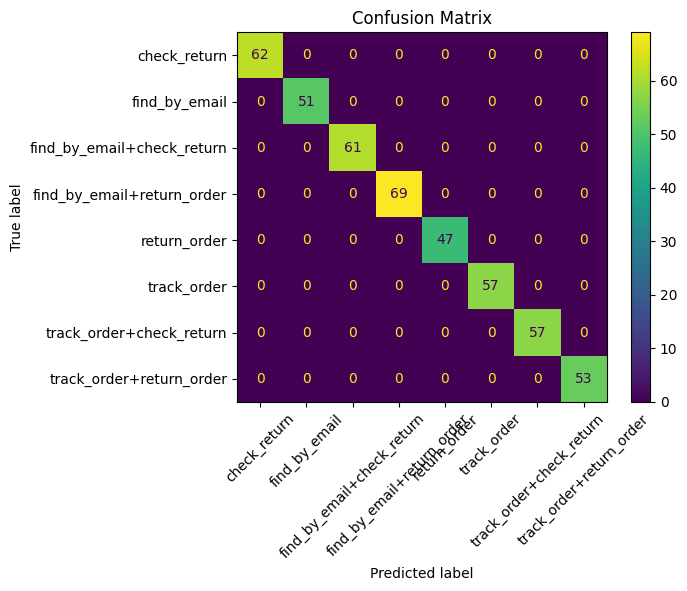

In [27]:
# Evaluation
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [28]:
# Save model, vectorizer, and label encoder
os.makedirs("C:/Users/Anirudh/Desktop/nlp_project/checkpointss/svm", exist_ok=True)
joblib.dump(model, "C:/Users/Anirudh/Desktop/nlp_project/checkpointss/svm/best_model.pkl")
joblib.dump(vectorizer, "C:/Users/Anirudh/Desktop/nlp_project/checkpointss/svm/vectorizer.pkl")
joblib.dump(label_encoder, "C:/Users/Anirudh/Desktop/nlp_project/checkpointss/svm/label_encoder.pkl")
print("Model and components saved.")


Model and components saved.


In [29]:
# Runtime logging
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")


Training completed in 13.41 seconds


In [30]:
# Predict on custom input
def predict_intent(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return label_encoder.inverse_transform([pred])[0]

# Example usage
predict_intent( "info order variability")


'find_by_email'